# Analysis of transaction lifetimes

In [1]:
suppressMessages({
    require(RColorBrewer, quietly=TRUE)
    require(data.table, quietly=TRUE)
    require(ggplot2, quietly=TRUE)
    require(ggraph, quietly=TRUE)
    require(igraph, quietly=TRUE)
    require(magrittr, quietly=TRUE)
    require(tidygraph, quietly=TRUE)
})

## UTxO lifetime

In [2]:
utxoLifetime <- fread("utxo-lifetime.tsv.gz", stringsAsFactors=TRUE)
colnames(utxoLifetime) <- c("UTxO lifetime [slots]", "UTxO lifetime [blocks]", "Number of UTxOs")
utxoLifetime %>% summary

 UTxO lifetime [slots] UTxO lifetime [blocks] Number of UTxOs  
 Min.   :        0     Min.   :       0       Min.   :      1  
 1st Qu.:   155845     1st Qu.:    7818       1st Qu.:      1  
 Median :   552388     Median :   28371       Median :      1  
 Mean   :  4960306     Mean   :  256349       Mean   :      3  
 3rd Qu.:  2739476     3rd Qu.:  142960       3rd Qu.:      1  
 Max.   :173731359     Max.   :12493533       Max.   :8396812  

### Histograms of lifetimes: days

#### Square-root scale

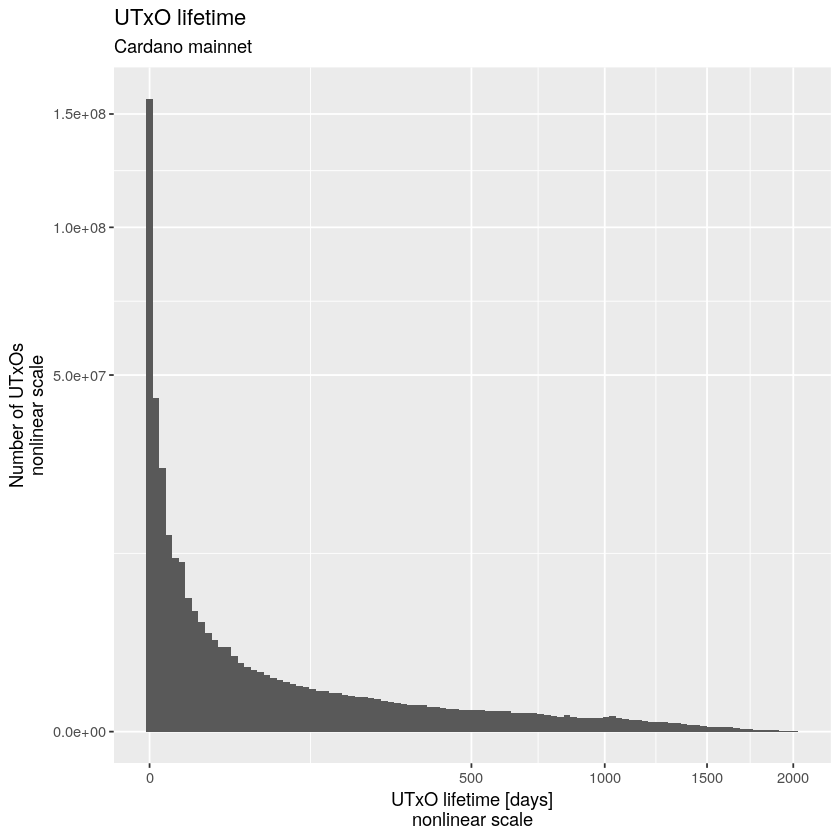

In [3]:
ggplot(utxoLifetime, aes(x=`UTxO lifetime [slots]`/60/60/24, weight=`Number of UTxOs`)) +
    geom_histogram(bins=100) +
    scale_x_sqrt() +
    scale_y_sqrt() +
    xlab("UTxO lifetime [days]\nnonlinear scale") +
    ylab("Number of UTxOs\nnonlinear scale") +
    ggtitle("UTxO lifetime", "Cardano mainnet")

In [4]:
ggsave("utxo-lifetime-days-sqrt.png", units="in", dpi=150, width=8, height=6)

In [5]:
ggsave("utxo-lifetime-days-sqrt.svg", units="in", dpi=150, width=8, height=6)

#### Logarithmic scale

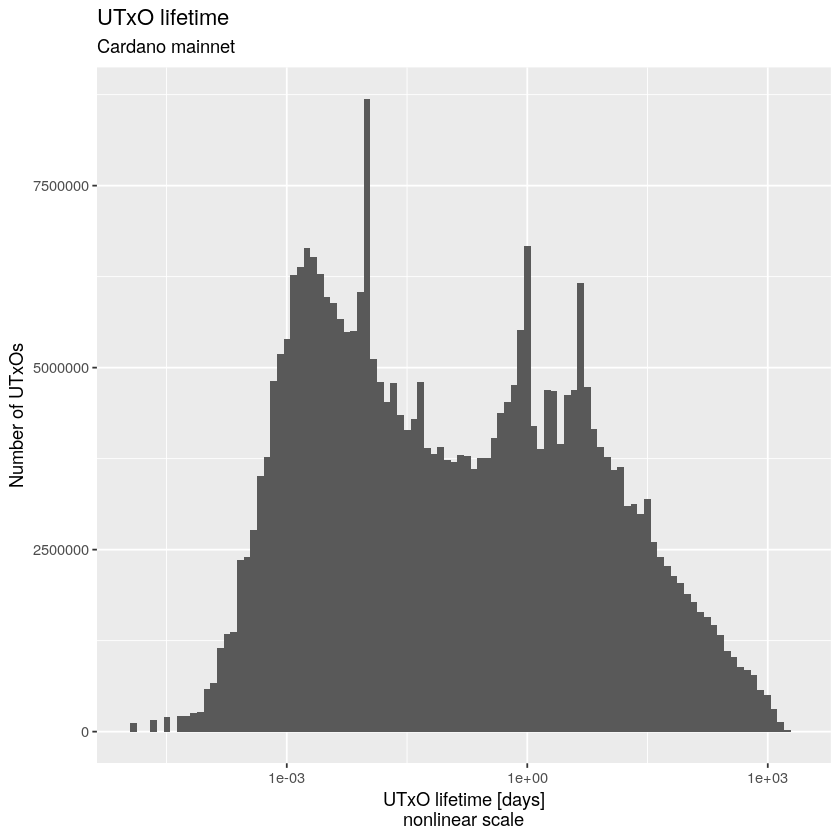

In [6]:
ggplot(utxoLifetime[`UTxO lifetime [slots]` > 0], aes(x=`UTxO lifetime [slots]`/60/60/24, weight=`Number of UTxOs`)) +
    geom_histogram(bins=100) +
    scale_x_log10() +
    xlab("UTxO lifetime [days]\nnonlinear scale") +
    ylab("Number of UTxOs") +
    ggtitle("UTxO lifetime", "Cardano mainnet")

In [7]:
ggsave("utxo-lifetime-days-log10.png", units="in", dpi=150, width=8, height=6)

In [8]:
ggsave("utxo-lifetime-days-log10.svg", units="in", dpi=150, width=8, height=6)

### Histograms of lifetimes: slots

#### Square-root scale

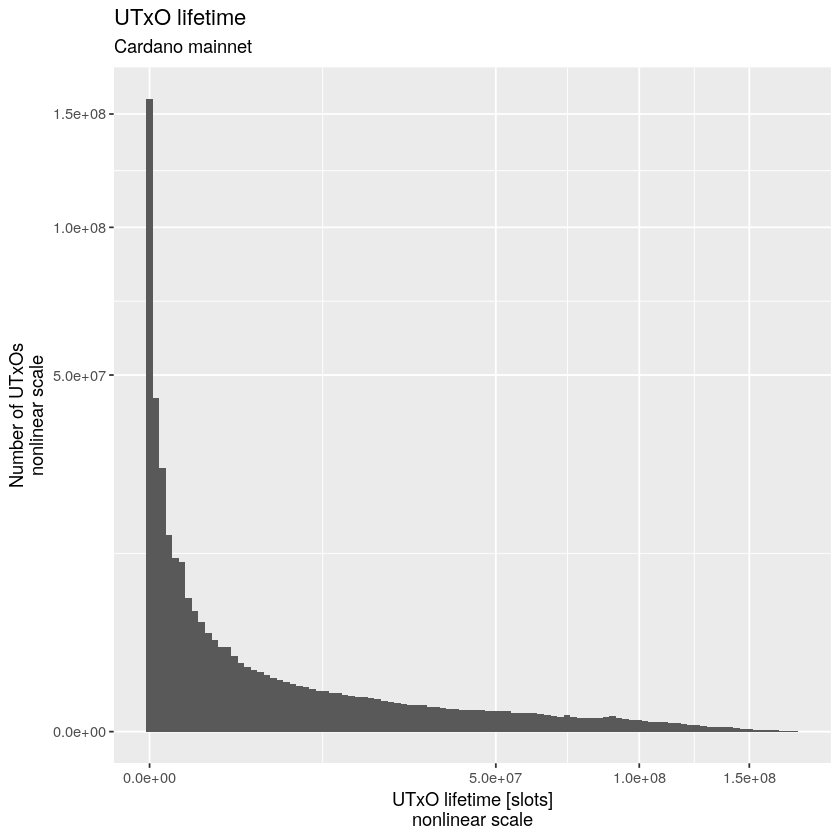

In [9]:
ggplot(utxoLifetime, aes(x=`UTxO lifetime [slots]`, weight=`Number of UTxOs`)) +
    geom_histogram(bins=100) +
    scale_x_sqrt() +
    scale_y_sqrt() +
    xlab("UTxO lifetime [slots]\nnonlinear scale") +
    ylab("Number of UTxOs\nnonlinear scale") +
    ggtitle("UTxO lifetime", "Cardano mainnet")

In [10]:
ggsave("utxo-lifetime-slots-sqrt.png", units="in", dpi=150, width=8, height=6)

In [11]:
ggsave("utxo-lifetime-slots-sqrt.svg", units="in", dpi=150, width=8, height=6)

#### Logarithmic scale

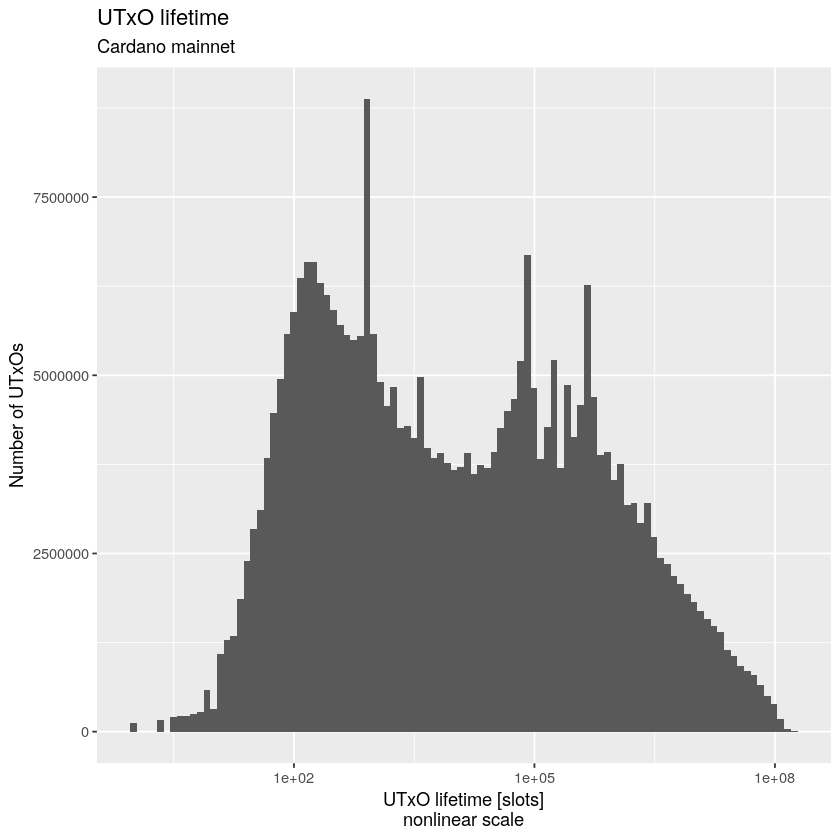

In [12]:
ggplot(utxoLifetime[`UTxO lifetime [slots]` > 0], aes(x=`UTxO lifetime [slots]`, weight=`Number of UTxOs`)) +
    geom_histogram(bins=100) +
    scale_x_log10() +
    xlab("UTxO lifetime [slots]\nnonlinear scale") +
    ylab("Number of UTxOs") +
    ggtitle("UTxO lifetime", "Cardano mainnet")

In [13]:
ggsave("utxo-lifetime-slots-log10.png", units="in", dpi=150, width=8, height=6)

In [14]:
ggsave("utxo-lifetime-slots-log10.svg", units="in", dpi=150, width=8, height=6)

### Histograms of lifetimes: blocks

#### Square-root scale

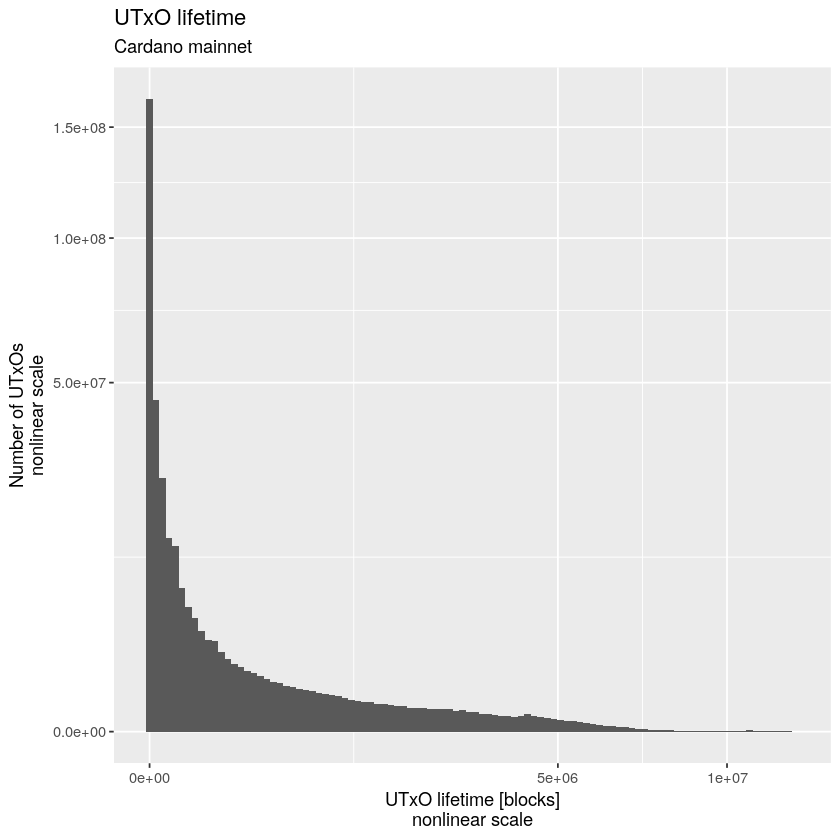

In [15]:
ggplot(utxoLifetime, aes(x=`UTxO lifetime [blocks]`, weight=`Number of UTxOs`)) +
    geom_histogram(bins=100) +
    scale_x_sqrt() +
    scale_y_sqrt() +
    xlab("UTxO lifetime [blocks]\nnonlinear scale") +
    ylab("Number of UTxOs\nnonlinear scale") +
    ggtitle("UTxO lifetime", "Cardano mainnet")

In [16]:
ggsave("utxo-lifetime-blocks-sqrt.png", units="in", dpi=150, width=8, height=6)

In [17]:
ggsave("utxo-lifetime-blocks-sqrt.svg", units="in", dpi=150, width=8, height=6)

#### Logarithmic scale

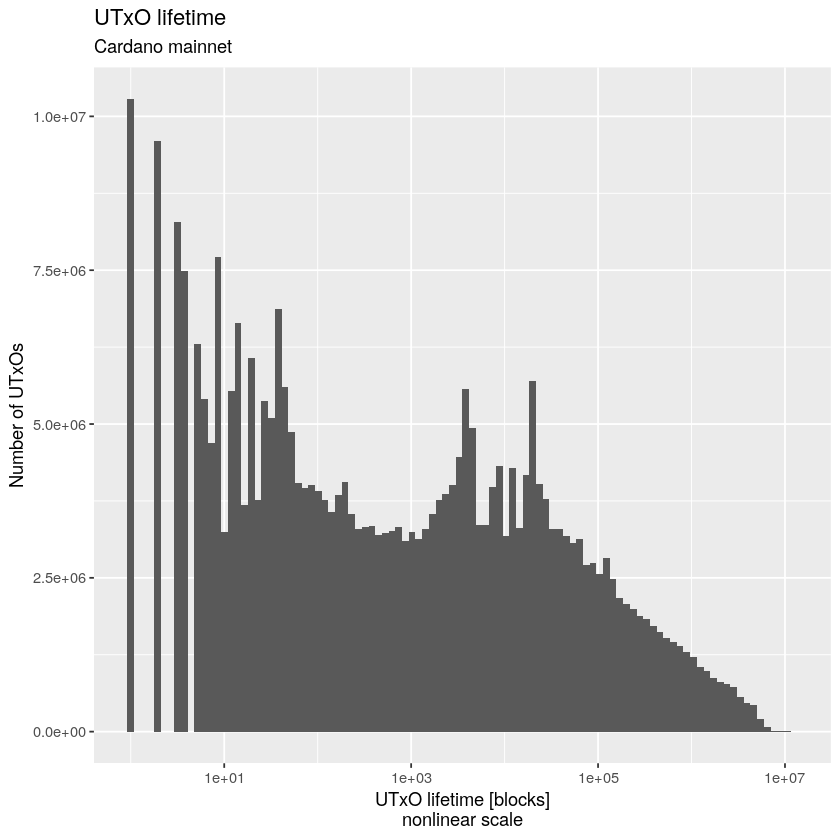

In [18]:
ggplot(utxoLifetime[`UTxO lifetime [blocks]` > 0], aes(x=`UTxO lifetime [blocks]`, weight=`Number of UTxOs`)) +
    geom_histogram(bins=100) +
    scale_x_log10() +
    xlab("UTxO lifetime [blocks]\nnonlinear scale") +
    ylab("Number of UTxOs") +
    ggtitle("UTxO lifetime", "Cardano mainnet")

In [19]:
ggsave("utxo-lifetime-blocks-log10.png", units="in", dpi=150, width=8, height=6)

In [20]:
ggsave("utxo-lifetime-blocks-log10.svg", units="in", dpi=150, width=8, height=6)

### Fraction of UTxOs being spent in the same block that they are created

In [21]:
utxoLifetime[`UTxO lifetime [slots]` == 0, sum(`Number of UTxOs`)] / utxoLifetime[, sum(`Number of UTxOs`)]

[1] 0.02580528

### Fraction of UTxOs being spent in the same day that they are created

In [22]:
utxoLifetime[`UTxO lifetime [slots]`< 24 * 60 * 60, sum(`Number of UTxOs`)] / utxoLifetime[, sum(`Number of UTxOs`)]

[1] 0.681876

## Size of UTxO set

In [23]:
utxoSet <- fread("utxo-set.tsv.gz", stringsAsFactors=TRUE)
colnames(utxoSet) <- c("Slot", "Number of transactions in active UTxO set")
utxoSet %>% summary

      Slot           Number of transactions in active UTxO set
 Min.   :        0   Min.   :   14505                         
 1st Qu.: 27345069   1st Qu.: 1924012                         
 Median : 74719885   Median : 8785634                         
 Mean   : 76286597   Mean   : 6848804                         
 3rd Qu.:122797315   3rd Qu.:10999892                         
 Max.   :174231487   Max.   :11272210                         

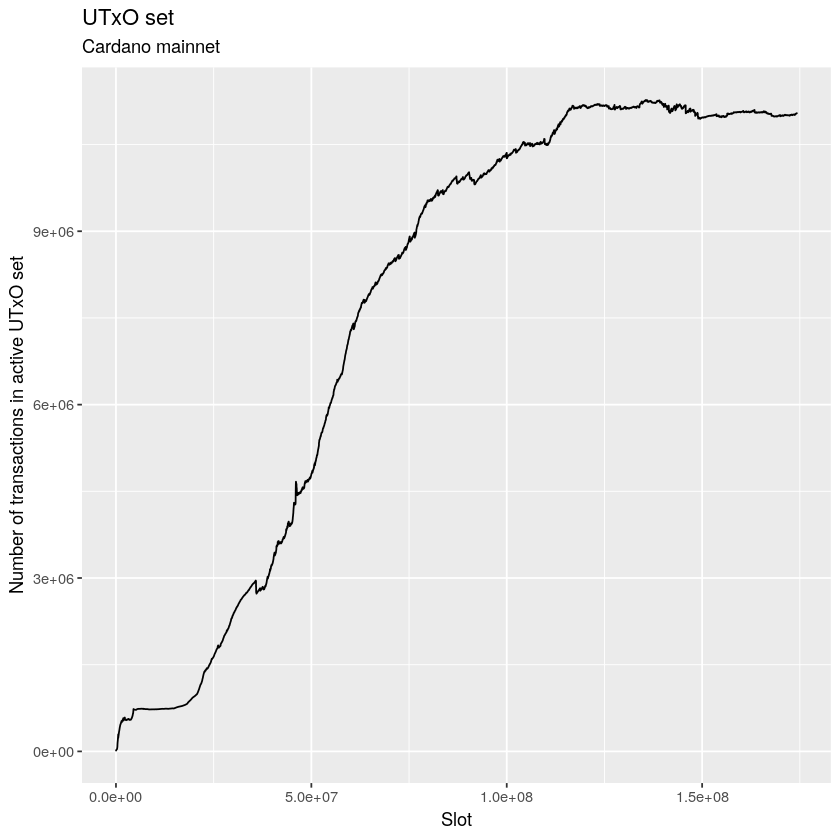

In [24]:
ggplot(utxoSet, aes(x=`Slot`, y=`Number of transactions in active UTxO set`)) +
    geom_line() +
    ggtitle("UTxO set", "Cardano mainnet")

In [25]:
ggsave("utxo-set.png", units="in", dpi=150, width=8, height=6)

In [26]:
ggsave("utxo-set.svg", units="in", dpi=150, width=8, height=6)

## Distribution of length of transaction chains

In [27]:
utxoEphemeral <- fread("utxo-ephemeral.tsv.gz", stringsAsFactors=TRUE)
utxoEphemeral %>% summary

                                                                utxo_id       
 0000006de9b75f3b45c6d214a2e3235779911ebb53816d5525bdf233176aea22#17:      1  
 000002fe69de5179b36904b17a1a2ecaa267e3d6543f6d38f360ab1c1c5c6584#1 :      1  
 000002fe69de5179b36904b17a1a2ecaa267e3d6543f6d38f360ab1c1c5c6584#2 :      1  
 000007b28e4ab75ed796025b4325389dd7cf92c6b6a5796a30da225e054fd7cb#0 :      1  
 00000876f56d6cfc02a5da6a398e5e006cbbddbc2c95bbcf6d14b58d96543bd5#0 :      1  
 00000876f56d6cfc02a5da6a398e5e006cbbddbc2c95bbcf6d14b58d96543bd5#3 :      1  
 (Other)                                                            :8396806  
  tx_create_id        tx_spend_id         slot_created      
 Min.   :    15959   Min.   :    15960   Min.   :    24254  
 1st Qu.: 51455392   1st Qu.: 51455393   1st Qu.: 73645032  
 Median : 81952926   Median : 81952931   Median :112489057  
 Mean   : 76470806   Mean   : 76470810   Mean   :109120981  
 3rd Qu.:102506051   3rd Qu.:102506055   3rd Qu.:142737437  
 M

### *Aside:* Find the largest subgraph on `mainnet` where UTxOs are spent in the same block they are created.

In [28]:
largest <- utxoEphemeral[, .N, .(`component`)][`N` == utxoEphemeral[, .N, .(`component`)][, max(`N`)]]
largest

component,N
<int>,<int>
110799810,222


Number of transactions involved.

In [29]:
unique(c(
    utxoEphemeral[`component` == largest$`component`, `tx_create_id`], 
    utxoEphemeral[`component` == largest$`component`, `tx_spend_id`]
)) %>% length

[1] 64

In [30]:
largestGraph <- as_tbl_graph(utxoEphemeral[`component` == largest$`component`, .(`from`=`tx_create_id`, `to`=`tx_spend_id`)], directed=TRUE)

In [31]:
write_graph(largestGraph, file="component-110799810.dot", format="dot")

```bash
sed -i -e '2arankdir=LR' component-110799810.dot
dot -T png -o component-110799810.png component-110799810.dot
```

![Largest component of UTxOs spent in the same block they are created](component-110799810.png)

### Betti 0 curve

We use the program [betti0](./betti0/) to compute [Betti 0 numbers](https://en.wikipedia.org/wiki/Betti_number) for [filtrations](https://en.wikipedia.org/wiki/Filtration_(mathematics)) of the `mainnet` transaction graph based on subgraphs where vertices are transactions and edges are UTxOs with a lifetime less than or equal to a specified number of blocks. We consider only UTxOs that were created and spent in epochs 400 through 599 and the graph of edges with lifetimes at most 30 blocks.

In [32]:
readLines("betti0/stats.30.txt")

[1] "Filter: block lifetime <= 30" "Vertices: 40048453"          
[3] "Edges: 56613409"

In [33]:
components <- fread("betti0/components.30.tsv.gz", stringsAsFactors=TRUE)
colnames(components) <- c("Maximum UTxO lifetime [blocks]", "Tx index", "Component ID")
components %>% summary

 Maximum UTxO lifetime [blocks]    Tx index          Component ID     
 Min.   : 0                     Min.   : 63425121   Min.   :       0  
 1st Qu.: 7                     1st Qu.: 77279970   1st Qu.:10017219  
 Median :15                     Median : 90861620   Median :19716745  
 Mean   :15                     Mean   : 90475376   Mean   :19790739  
 3rd Qu.:23                     3rd Qu.:103590699   3rd Qu.:29911300  
 Max.   :30                     Max.   :116770807   Max.   :40048452  

In [34]:
componentDistribution <- components[, .(`Number of transactions`=.N), .(`Maximum UTxO lifetime [blocks]`, `Component ID`)]
componentDistribution %>% summary

 Maximum UTxO lifetime [blocks]  Component ID      Number of transactions
 Min.   : 0.000                 Min.   :       0   Min.   :      1       
 1st Qu.: 3.000                 1st Qu.: 8861923   1st Qu.:      1       
 Median : 8.000                 Median :18276838   Median :      1       
 Mean   : 9.969                 Mean   :19161483   Mean   :      3       
 3rd Qu.:16.000                 3rd Qu.:29673542   3rd Qu.:      2       
 Max.   :30.000                 Max.   :40048452   Max.   :8206721       

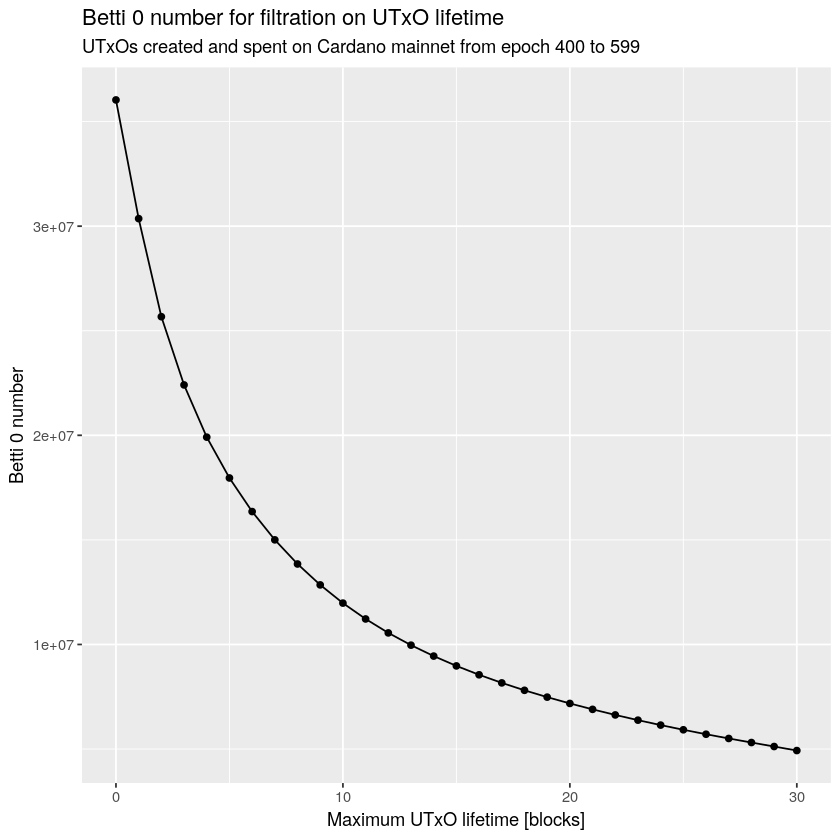

In [35]:
ggplot(
    componentDistribution[, .(`Betti 0 number`=.N), .(`Maximum UTxO lifetime [blocks]`)],
    aes(x=`Maximum UTxO lifetime [blocks]`, y=`Betti 0 number`)
) +
    geom_point() +
    geom_line() +
    ggtitle(
        "Betti 0 number for filtration on UTxO lifetime",
        "UTxOs created and spent on Cardano mainnet from epoch 400 to 599"
    )

In [36]:
ggsave("betti0-curve.png", units="in", dpi=150, width=8, height=6)

In [37]:
ggsave("betti0-curve.svg", units="in", dpi=150, width=8, height=6)

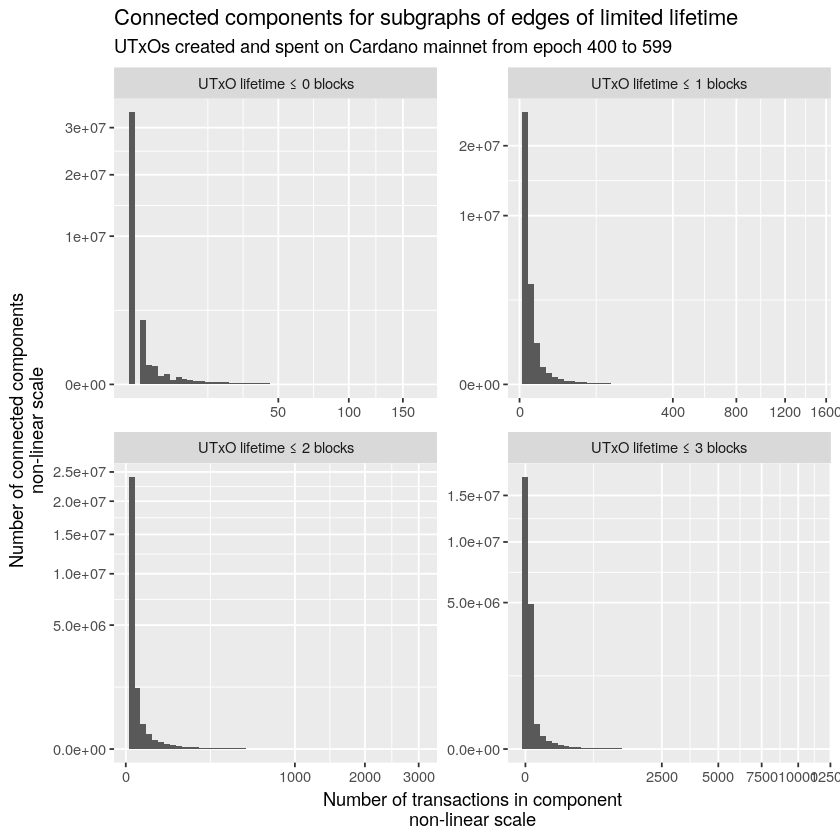

In [38]:
ggplot(
    componentDistribution[`Maximum UTxO lifetime [blocks]` < 4],
    aes(x=`Number of transactions`)
) +
    geom_histogram(bins=50) +
    scale_x_sqrt() +
    scale_y_sqrt() +
    facet_wrap(paste("UTxO lifetime ≤", `Maximum UTxO lifetime [blocks]`, "blocks") ~ ., scales="free") +
    xlab("Number of transactions in component\nnon-linear scale") +
    ylab("Number of connected components\nnon-linear scale") +
    ggtitle(
        "Connected components for subgraphs of edges of limited lifetime",
        "UTxOs created and spent on Cardano mainnet from epoch 400 to 599"
    )

In [39]:
ggsave("betti0-components.png", units="in", dpi=150, width=8, height=6)

In [40]:
ggsave("betti0-components.svg", units="in", dpi=150, width=8, height=6)

### Span and maximum antichain length

In [41]:
blockStats <- fread("betti0/block-stats.tsv.gz", stringsAsFactors=TRUE)[`Block no` >= 8526132]
blockStats %>% summary

    Block no           Tx count           Span           Antichain     
 Min.   : 8526132   Min.   :  1.00   Min.   :  1.000   Min.   :  1.00  
 1st Qu.: 9567909   1st Qu.:  4.00   1st Qu.:  1.000   1st Qu.:  4.00  
 Median :10609208   Median : 10.00   Median :  1.000   Median :  9.00  
 Mean   :10624776   Mean   : 13.57   Mean   :  1.551   Mean   : 12.74  
 3rd Qu.:11674468   3rd Qu.: 19.00   3rd Qu.:  2.000   3rd Qu.: 18.00  
 Max.   :12779642   Max.   :385.00   Max.   :168.000   Max.   :385.00  

#### Number of transactions

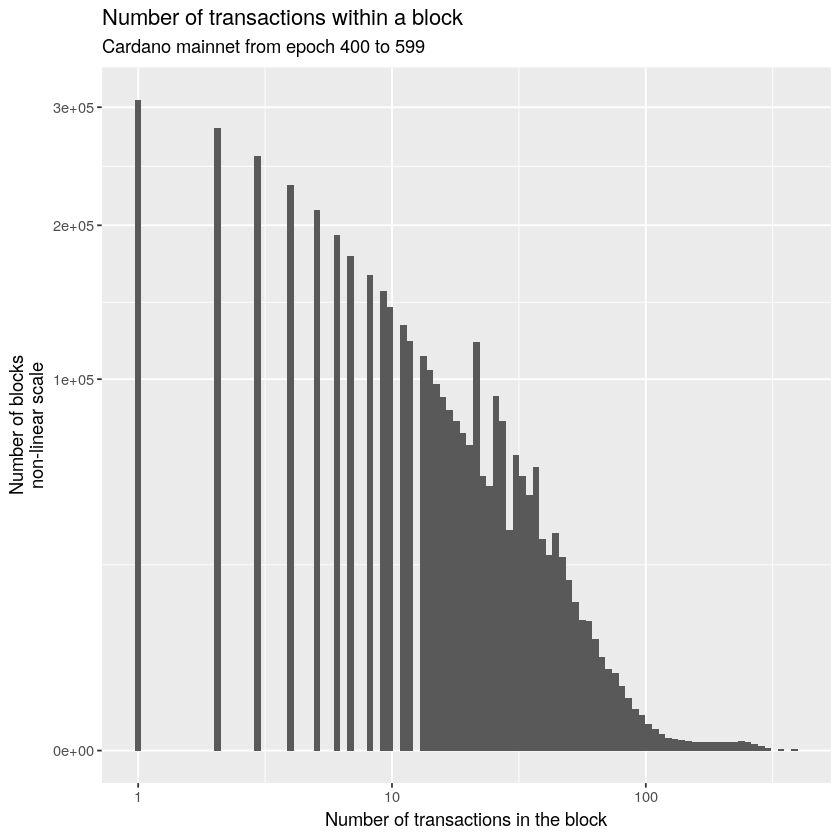

In [42]:
ggplot(blockStats, aes(x=`Tx count`)) +
    geom_histogram(bins=100) +
    scale_x_log10() +
    scale_y_sqrt() +
    xlab("Number of transactions in the block") +
    ylab("Number of blocks\nnon-linear scale") +
    ggtitle(
        "Number of transactions within a block",
        "Cardano mainnet from epoch 400 to 599"
    )

In [43]:
ggsave("betti0-txs.png", units="in", dpi=150, width=8, height=6)

In [44]:
ggsave("betti0-txs.svg", units="in", dpi=150, width=8, height=6)

#### The span is the longest sequence of edges in a graph. In this context it indicates how many ledger `apply` steps must be done sequentially.

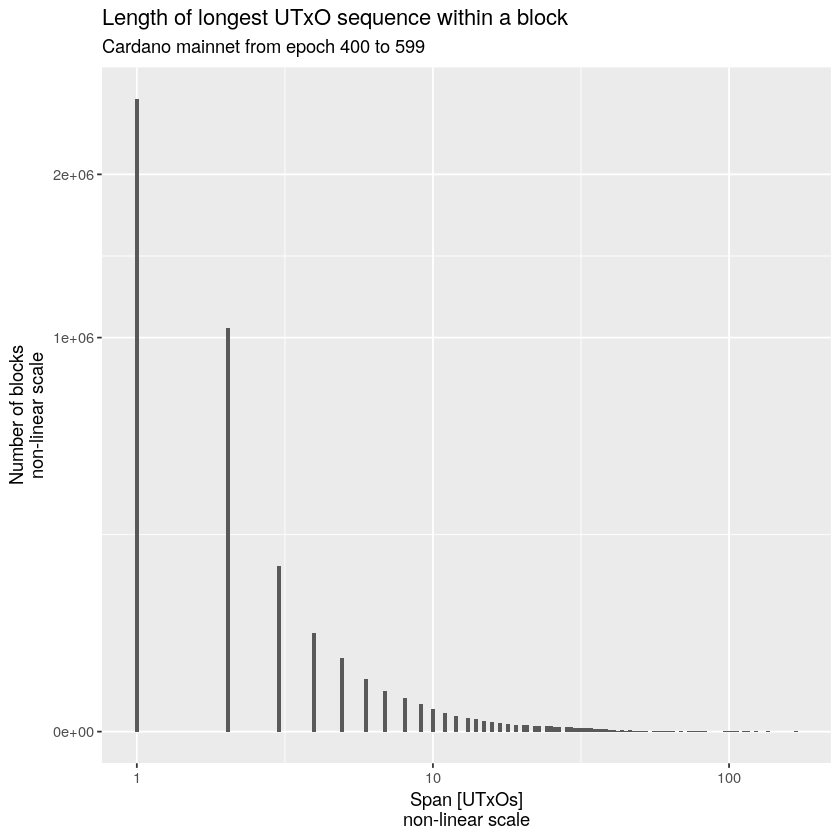

In [45]:
ggplot(blockStats, aes(x=`Span`)) +
    geom_histogram(bins=168) +
    scale_x_log10() +
    scale_y_sqrt() +
    xlab("Span [UTxOs]\nnon-linear scale") +
    ylab("Number of blocks\nnon-linear scale") +
    ggtitle(
        "Length of longest UTxO sequence within a block",
        "Cardano mainnet from epoch 400 to 599"
    )

In [46]:
ggsave("betti0-span.png", units="in", dpi=150, width=8, height=6)

In [47]:
ggsave("betti0-span.svg", units="in", dpi=150, width=8, height=6)

#### The maximum antichain length is the widest portion of a directed graph. In this context it indicates how many ledger `apply` steps can be done in parallel.

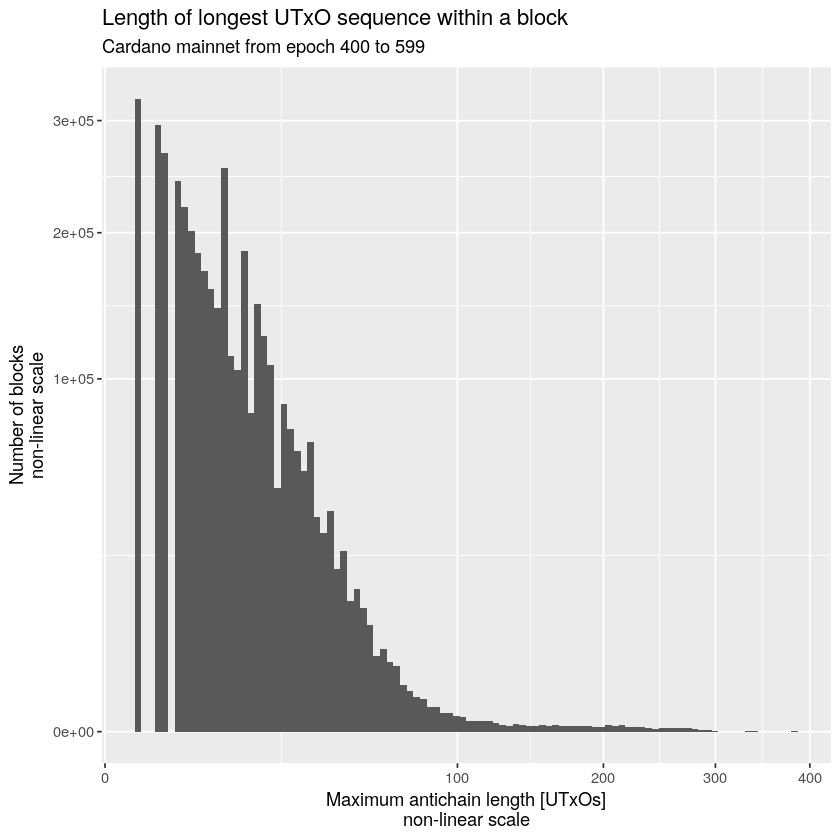

In [48]:
ggplot(blockStats, aes(x=`Antichain`)) +
    geom_histogram(bins=100) +
    scale_x_sqrt() +
    scale_y_sqrt() +
    xlab("Maximum antichain length [UTxOs]\nnon-linear scale") +
    ylab("Number of blocks\nnon-linear scale") +
    ggtitle(
        "Length of longest UTxO sequence within a block",
        "Cardano mainnet from epoch 400 to 599"
    )

In [49]:
ggsave("betti0-antichain.png", units="in", dpi=150, width=8, height=6)

In [50]:
ggsave("betti0-antichain.svg", units="in", dpi=150, width=8, height=6)

#### Span vs maximum antichain length

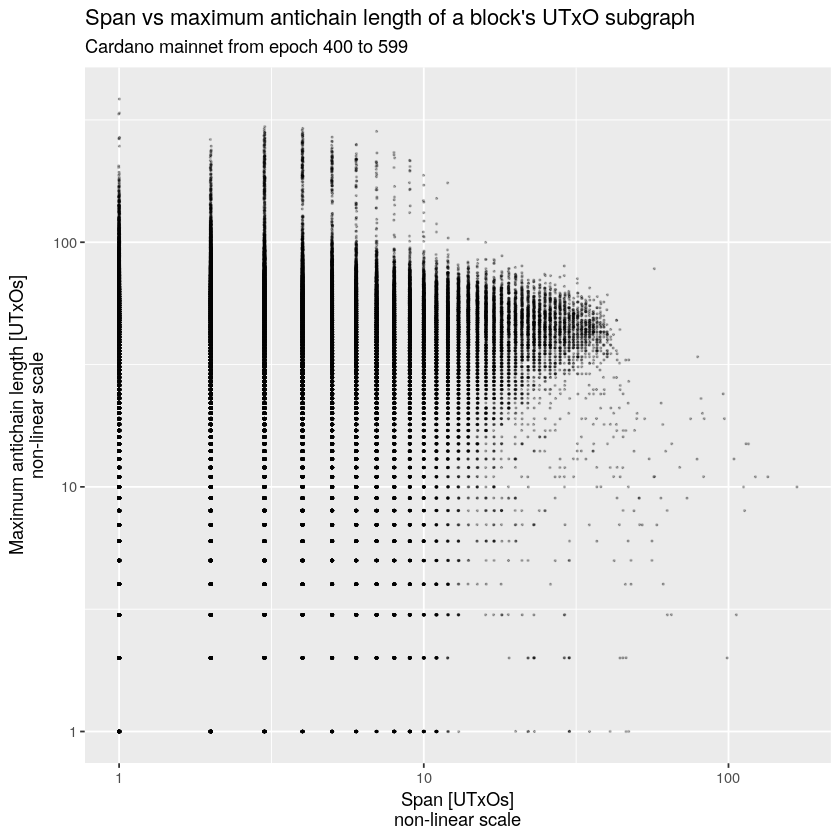

In [51]:
ggplot(blockStats, aes(x=`Span`, y=`Antichain`)) +
    geom_point(size=0.25, alpha=0.25, position="jitter") +
    scale_x_log10() +
    scale_y_log10() +
    xlab("Span [UTxOs]\nnon-linear scale") +
    ylab("Maximum antichain length [UTxOs]\nnon-linear scale") +
    ggtitle(
        "Span vs maximum antichain length of a block's UTxO subgraph",
        "Cardano mainnet from epoch 400 to 599"
    )

In [52]:
ggsave("betti0-span-antichain.png", units="in", dpi=150, width=8, height=6)

In [53]:
ggsave("betti0-span-antichain.svg", units="in", dpi=150, width=8, height=6)